In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import norm
%matplotlib inline

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Train data 
dt_train = pd.read_csv('data/train.csv')
dt_train_id = dt_train['Id']
dt_train.drop('Id', axis = 1, inplace = True)

#Test data
dt_test = pd.read_csv('data/test.csv')
dt_test_id = dt_test['Id']
dt_test.drop('Id', axis = 1, inplace = True)

Text(0.5, 1.0, 'SalePrice Distribution')

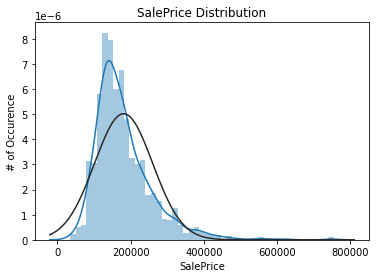

In [4]:
# Plotting Distribution of target values
target_col = 'SalePrice'
sb.distplot(dt_train[target_col], fit=norm)
plt.ylabel('# of Occurence')
plt.title('SalePrice Distribution')

In [5]:
print("Skewness of target function:", dt_train[target_col].skew())

Skewness of target function: 1.8828757597682129


From the plot and the skewness value one can see that the target fucntion is positive skewed. Thus, the target fucntion ought to be normalized.

Text(0.5, 1.0, 'SalePrice Distribution')

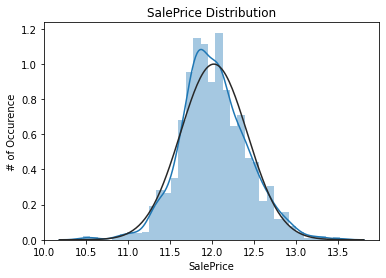

In [6]:
dt_train[target_col] = np.log1p(dt_train[target_col])
sb.distplot(dt_train[target_col], fit=norm)
plt.ylabel('# of Occurence')
plt.title('SalePrice Distribution')

The normalizaton was applied using log1p() function of numpy library, and from the figure one can see that now target funstion distribution is normalized.

<AxesSubplot:>

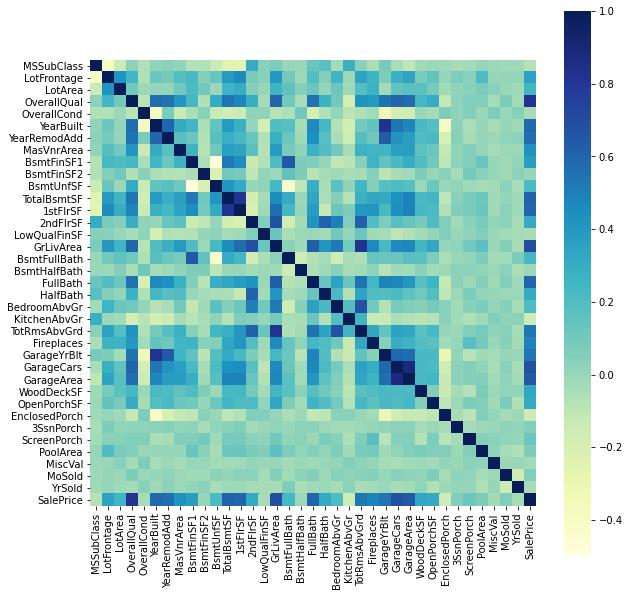

In [7]:
correlation_mat = dt_train.corr()
plt.subplots(figsize=(10, 10))
sb.heatmap(correlation_mat, vmax=1, square=True, cmap="YlGnBu")

The figure above shows the correalion matrix for the train data. This was done in order to see the correlation between different features and mainly correlation between features and target value, the sale price.

<AxesSubplot:>

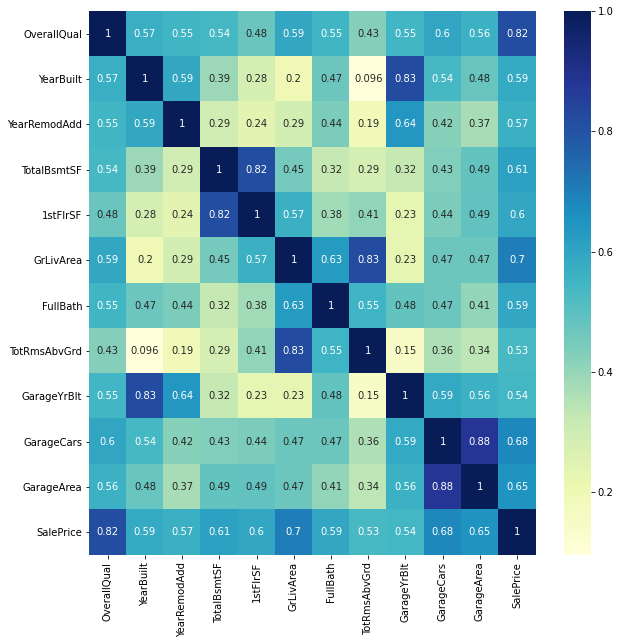

In [8]:
dt_correlation = dt_train.corr()
best_correlation_features = dt_correlation.index[(dt_correlation[target_col]>0.5) | (dt_correlation[target_col]<-0.5)]
plt.figure(figsize=(10,10))
sb.heatmap(dt_train[best_correlation_features].corr(), annot=True, cmap="YlGnBu")

From figure above one can see how the best correlation features relate to each other. Now we can decide which features to omit and which features to keep. For example, Overall quality of the building stringly correlates with the sale price, showing tha this is an important feature. In additon, one can see that Year built and Garage Year built also strongly correlate, so we can ommit one of them to reduce the dimension.

In [9]:
dt_correlation[target_col].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Next, we will handle outliers. To do that the best correlated features are plotted vs sale price, to determine from plot which data points to drop.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

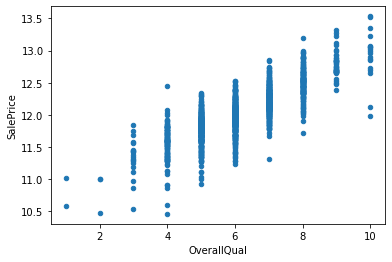

In [10]:
#Scatter plotting for Overall Quality feature
current_col = 'OverallQual'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

From the plot no explicit outliers are detected, thus data point drop at this stage.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

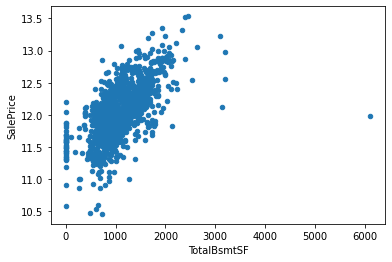

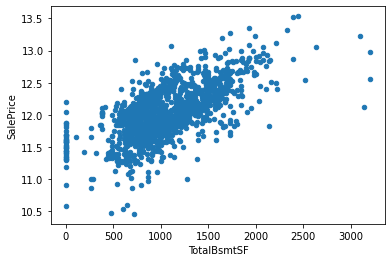

In [11]:
#Scatter plotting for TotalBsmtSF feature
current_col = 'TotalBsmtSF'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

#Deleting outliers
dt_train = dt_train.drop(dt_train[(dt_train[current_col]>4000)].index)

#Scatter plotting for TotalBsmtSF feature without outliers
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

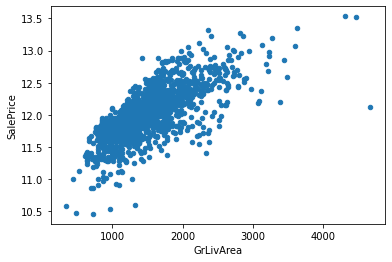

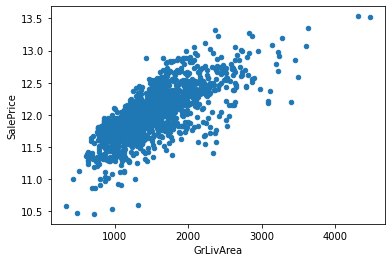

In [12]:
#Scatter plotting for GrLivArea feature
current_col = 'GrLivArea'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

#Deleting outliers
dt_train = dt_train.drop(dt_train[(dt_train[current_col]>4000) & (dt_train[target_col]<13)].index)

#Scatter plotting for GrLivArea feature without outliers
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

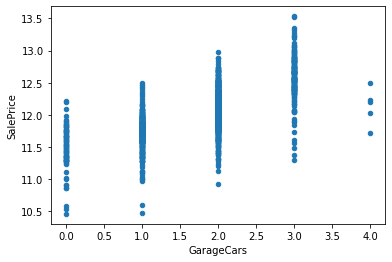

In [13]:
#Scatter plotting for GarageCars feature
current_col = 'GarageCars'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

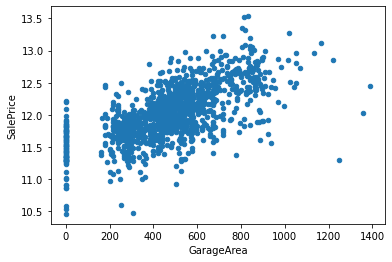

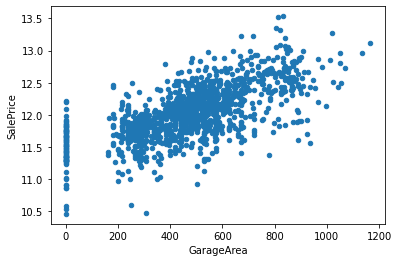

In [14]:
#Scatter plotting for GarageArea feature
current_col = 'GarageArea'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

#Deleting outliers
dt_train = dt_train.drop(dt_train[(dt_train[current_col]>1210)].index)

#Scatter plotting for GarageArea feature without outliers
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

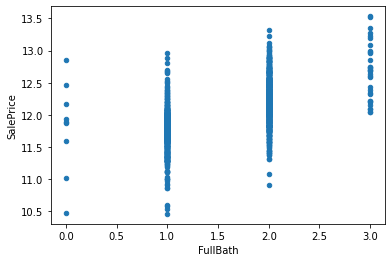

In [15]:
#Scatter plotting for FullBath feature
current_col = 'FullBath'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

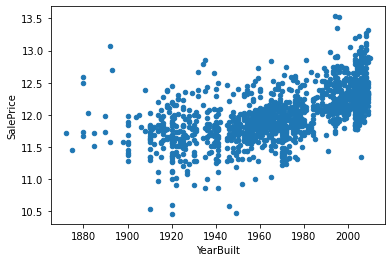

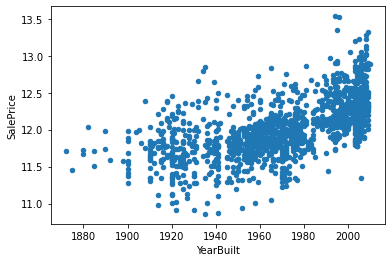

In [16]:
#Scatter plotting for YearBuilt feature
current_col = 'YearBuilt'
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

#Deleting outliers
dt_train = dt_train.drop(dt_train[((dt_train[current_col]<1900) & (dt_train[target_col]>12.3)) | (dt_train[target_col]<10.8)].index)

#Scatter plotting for YearBuilt feature without outliers
dt_plot = pd.concat([dt_train[target_col], dt_train[current_col]], axis=1)
dt_plot.plot.scatter(x=current_col, y=target_col)

At this stage, we have finished data outlier handling. Next step is to impute missing data.

In [17]:
dt_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [18]:
y_dt_train = dt_train[target_col]
x_dt_train = dt_train.drop([target_col], axis=1)
dt_combined = pd.concat([x_dt_train, dt_test], axis=0, sort=False)
miss_percentage = (dt_combined.isnull().sum() / dt_combined.isnull().count()).sort_values(ascending=False)*100
dt_miss = pd.concat([miss_percentage], axis=1, keys=['Percentage'])
dt_miss.head(20)

,Percentage
PoolQC,99.690083
MiscFeature,96.418733
Alley,93.250689
Fence,80.475207
FireplaceQu,48.691460
LotFrontage,16.701102
GarageCond,5.371901
GarageQual,5.371901
GarageYrBlt,5.371901
GarageFinish,5.371901


In [19]:
dt_combined.drop((dt_miss[dt_miss['Percentage'] > 4]).index, axis=1, inplace=True)

Now, features that have mising data percentage higher than 4 are omitted. These features also have bad correlation with target value, thus it is relevant to drop them.

In [20]:
dt_combined = dt_combined.drop(['Utilities'], axis=1)
dt_combined['Functional'] = dt_combined['Functional'].fillna("Typ")

for column in ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    dt_combined[column] = dt_combined[column].fillna(0)

for column in ('MasVnrType','MSSubClass', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dt_combined[column] = dt_combined[column].fillna('None')
    
for column in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    dt_combined[column] = dt_combined[column].fillna(dt_combined[column].mode()[0])

Missing data points are filled with either 0, None or Typ. These parameters are shosen heuristically. Now let's  check missing data points are left.

In [21]:
dt_combined.isnull().sum() 

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 67, dtype: int64

In [22]:
num_features = dt_combined.dtypes[dt_combined.dtypes != 'object'].index
skw_num_features = dt_combined[num_features].apply(lambda dp: skew(dp)).sort_values(ascending=False)
high_skw_num_features = skw_num_features[abs(skw_num_features) > 0.5]
for feature in high_skw_num_features.index:
    dt_combined[feature] = np.log1p(dt_combined[feature])

At this stage, features that have high skewness are detected, and normalization is applied on them using log1p() function.

In [23]:
dt_combined['TotalSF'] = dt_combined['TotalBsmtSF'] + dt_combined['1stFlrSF'] + dt_combined['2ndFlrSF']
dt_combined.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1, inplace = True)


Here, a new feature called TotalSF was constructed, which is a summation of TotalBsmtSF, 1stFlrSF and 2ndFlrSF. These features are combined, as it was previously seen from correlation matrix, these feature strongly correalate to each other, thus dimension reduction was applied.

In [24]:
dt_combined = pd.get_dummies(dt_combined)
dt_combined.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0


Now, the categorical data was conveted to numerical representation, for better classifier interpretation. 

In [25]:
from sklearn.feature_selection import VarianceThreshold
dt_X = dt_combined[:dt_train.shape[0]]
print ('Before Variance Threshold: ',dt_X.shape[1])
vt = VarianceThreshold(threshold=(0.15))
vt.fit_transform(dt_X)
print ('After Variance Threshold: ', dt_X.shape[1])

Before Variance Threshold:  249
After Variance Threshold:  249


Here, the variance threshold for train data features was applied, to exclude features that have low variance. Here, the variance threshold value is 0.15, which is approximately 80 percent for p.

In [26]:
x_dt_train = dt_combined[:len(y_dt_train)]
x_dt_test = dt_combined[len(y_dt_train):]
print ('After data processing x train shape: ', x_dt_train.shape)
print ('After data processing x test shape: ', x_dt_test.shape)

After data processing x train shape:  (1445, 249)
After data processing x test shape:  (1459, 249)


In [27]:
x_dt_test.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,5.602119,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,6.008813,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,4.927254,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,5.783825,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,6.925595,...,0,0,0,1,0,0,0,0,1,0
5,4.110874,9.210440,6,1.791759,7.597898,1994,0.000000,0.000000,0.000000,6.638568,...,0,0,0,1,0,0,0,0,1,0
6,3.044522,8.984819,6,2.079442,7.597396,2007,0.000000,6.841615,0.000000,5.455321,...,0,0,0,1,0,0,0,0,1,0
7,4.110874,9.036344,6,1.791759,7.600402,1998,0.000000,0.000000,0.000000,6.672033,...,0,0,0,1,0,0,0,0,1,0
8,3.044522,9.227886,7,1.791759,7.596392,1990,0.000000,6.458338,0.000000,6.498282,...,0,0,0,1,0,0,0,0,1,0
9,3.044522,9.036106,4,1.791759,7.586296,1970,0.000000,6.690842,4.369448,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [28]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_dt_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_dt_train, y_dt_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [29]:
sol_data = pd.read_csv('/home/maksat/Desktop/Programs/jupyter/Final Project/data/solution.csv')
y_true = sol_data['SalePrice']
y_true = y_true.to_numpy()
y_true

array([105000., 172000., 189900., ..., 131000., 132000., 188000.])

Hyperparameter tuning:

In [30]:
import xgboost as XGB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
# param_space = {
#     'learning_rate': list(np.linspace(0.05, 0.11, 50)),
#     'min_child_weight': list(np.linspace(0.05, 0.06, 10)),
#     'reg_alpha': list(np.linspace(0.35, 0.4, 10)),
#     'reg_lambda': list(np.linspace(0.35, 0.4, 10)),
#     'colsample_bytree': list(np.linspace(0.5, 1.0, 5)),
#     'subsample': list(np.linspace(0.7, 0.9, 10)),
#     'n_estimators': [3000]
# }
# param_space = {
#     'n_estimators': [3000], 
#     'learning_rate': list(np.linspace(0.001, 0.5, 50)), 
#     'max_depth': list(np.linspace(0, 20)),  
#     'min_samples_leaf': list(np.linspace(0, 0.5, 20)), 
#     'min_samples_split': list(np.linspace(0, 0.5, 20))
# }
param_space= {
        'n_estimators': [3000],
        'learning_rate': list(np.linspace(0.001, 0.05, 1)), 
        'max_bin': list(np.arange(100, 500)), 
        'bagging_seed': list(np.arange(0, 10)),
        'feature_fraction_seed': list(np.arange(0, 10))
}

the_model = LGBMRegressor() 
search = RandomizedSearchCV(the_model, param_space, n_iter = 10, scoring="neg_mean_squared_error")
search.fit(x_dt_test, y_true)
search.best_estimator_
#the_model.fit(x_dt_train, y_dt_train)

LGBMRegressor(bagging_seed=2, feature_fraction_seed=6, learning_rate=0.001,
              max_bin=294, n_estimators=3000)

In [31]:
np.mean(rmse_CV_train(the_model))#0.11355365 XGB #0.118504 GBR #0.1194219 LGBM

0.11743775840245355

In [44]:
XGB_model = XGB.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.05, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=0.052222222222222225,
              n_estimators=3000, n_jobs=12,
             num_parallel_tree=1, random_state=0, reg_alpha=0.36666666666666664,
             reg_lambda=0.3555555555555555, scale_pos_weight=1,
             subsample=0.8111111111111111, tree_method='exact',
             validate_parameters=1)
xgb_m = XGB_model.fit(x_dt_test, y_true)
gbr_model = GradientBoostingRegressor(learning_rate=0.05,
                          max_depth=4.8979591836734695,
                          min_samples_leaf=0.02631578947368421,
                          min_samples_split=0.15789473684210525,
                          n_estimators=3000)
gbr_m = gbr_model.fit(x_dt_test, y_true)
lgbm_model = LGBMRegressor(bagging_seed=7, feature_fraction_seed=0,
              learning_rate=0.05, max_bin=106,
              n_estimators=3000)
lgbm_m = lgbm_model.fit(x_dt_test, y_true)
def ensemble_model(X):
    return ((0.34 * xgb_m.predict(X)) + \
            (0.33 * gbr_m.predict(X)) + \
            (0.33 * lgbm_m.predict(X)))
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

[22:42:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
print('RMSLE score on train data:')
print(rmsle(y_true, ensemble_model(x_dt_test)))

RMSLE score on train data:
2077.7294607526846


In [43]:
y_predict = np.floor(np.expm1(xgb_m.predict(x_dt_test)))
y_predict

array([inf, inf, inf, ..., inf, inf, inf], dtype=float32)

In [40]:
sub = pd.DataFrame()
sub['Id'] = dt_test_id
sub['SalePrice'] = y_predict
sub.to_csv('mysubmission1.csv',index=False)

In [41]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_true, y_predict) )
print("The score is %.5f" % RMSLE )

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').